# Importing the Dependencies

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from imblearn.under_sampling import RandomUnderSampler

# Data Collection

In [2]:
data = pd.read_csv("C:\\Users\\Gauri Mohite\\Documents\\Poject(stat sir)\Loan_prediction.csv")
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
data.shape

(614, 13)

# Data Analysis 

In [4]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [5]:
data.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
# Cheacking for Percentage of null values
data.isna().sum()/len(data)*100

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

# Impute Missing Values

In [7]:
# impute mode
data['Gender'].fillna(data['Gender'].mode()[0],inplace=True)
data['Married'].fillna(data['Married'].mode()[0],inplace=True)
data['Dependents'].fillna(data['Dependents'].mode()[0],inplace=True)
data['Self_Employed'].fillna(data['Self_Employed'].mode()[0],inplace=True)
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0],inplace=True)
data['Credit_History'].fillna(data['Credit_History'].mode()[0],inplace=True)

# impute median
data['LoanAmount'].fillna(data['LoanAmount'].median(),inplace=True)

In [8]:
data.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [9]:
data = data.drop_duplicates()
data.shape

(614, 13)

In [10]:
table = pd.pivot_table(data, values=data.columns, index=['Loan_Status'],aggfunc=np.mean)
table

,ApplicantIncome,CoapplicantIncome,Credit_History,LoanAmount,Loan_Amount_Term
Loan_Status,,,,,
N,5446.078125,1877.807292,0.572917,149.890625,344.56250
Y,5384.068720,1504.516398,0.983412,143.869668,341.43128


In [11]:
table = pd.pivot_table(data, values=data.columns, index='Loan_Status', aggfunc=np.min)
table

,ApplicantIncome,CoapplicantIncome,Credit_History,Dependents,Education,Gender,LoanAmount,Loan_Amount_Term,Loan_ID,Married,Property_Area,Self_Employed
Loan_Status,,,,,,,,,,,,
N,150,0.0,0.0,0,Graduate,Female,9.0,36.0,LP001003,No,Rural,No
Y,210,0.0,0.0,0,Graduate,Female,17.0,12.0,LP001002,No,Rural,No


In [12]:
table = pd.pivot_table(data, values=data.columns, index='Loan_Status', aggfunc=np.max)
table

,ApplicantIncome,CoapplicantIncome,Credit_History,Dependents,Education,Gender,LoanAmount,Loan_Amount_Term,Loan_ID,Married,Property_Area,Self_Employed
Loan_Status,,,,,,,,,,,,
N,81000,41667.0,1.0,3+,Not Graduate,Male,570.0,480.0,LP002990,Yes,Urban,Yes
Y,63337,20000.0,1.0,3+,Not Graduate,Male,700.0,480.0,LP002984,Yes,Urban,Yes


# Data Visualization

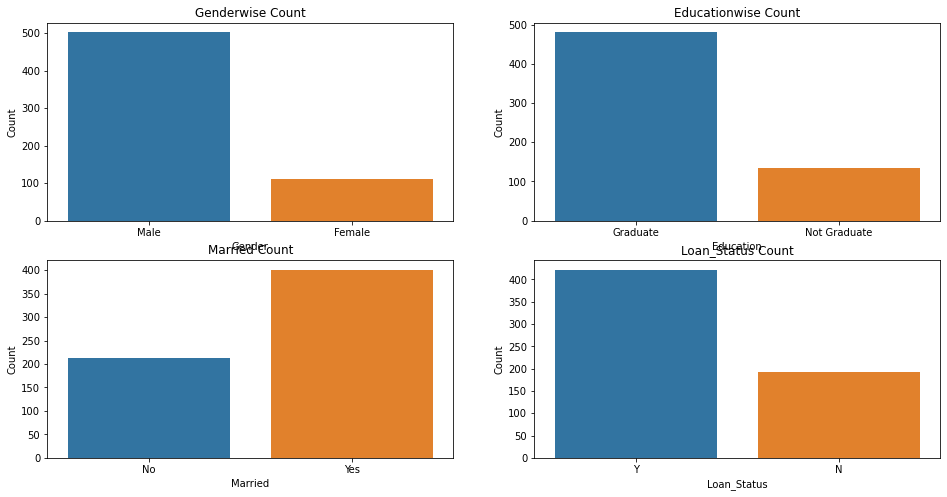

In [13]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.countplot(x='Gender',data=data)
plt.title("Genderwise Count")
plt.xlabel("Gender")
plt.ylabel("Count")

plt.subplot(2,2,2)
sns.countplot(x='Education',data=data)
plt.title("Educationwise Count")
plt.xlabel("Education")
plt.ylabel("Count")

plt.subplot(2,2,3)
sns.countplot(x='Married',data=data)
plt.title("Married Count")
plt.xlabel("Married")
plt.ylabel("Count")

plt.subplot(2,2,4)
sns.countplot(x='Loan_Status',data=data)
plt.title("Loan_Status Count")
plt.xlabel("Loan_Status")
plt.ylabel("Count")

plt.show()

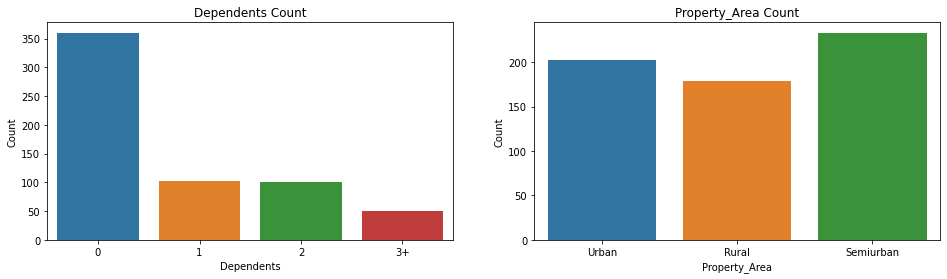

In [14]:
plt.figure(figsize=(16,4))

plt.subplot(1,2,1)
sns.countplot(x='Dependents',data=data)
plt.title("Dependents Count")
plt.xlabel("Dependents")
plt.ylabel("Count")

plt.subplot(1,2,2)
sns.countplot(x='Property_Area',data=data)
plt.title("Property_Area Count")
plt.xlabel("Property_Area")
plt.ylabel("Count")

plt.show()

In [15]:
data['LoanAmount_log']=np.log(data['LoanAmount'])
data['ApplicantIncome_log']=np.log(data['ApplicantIncome'])

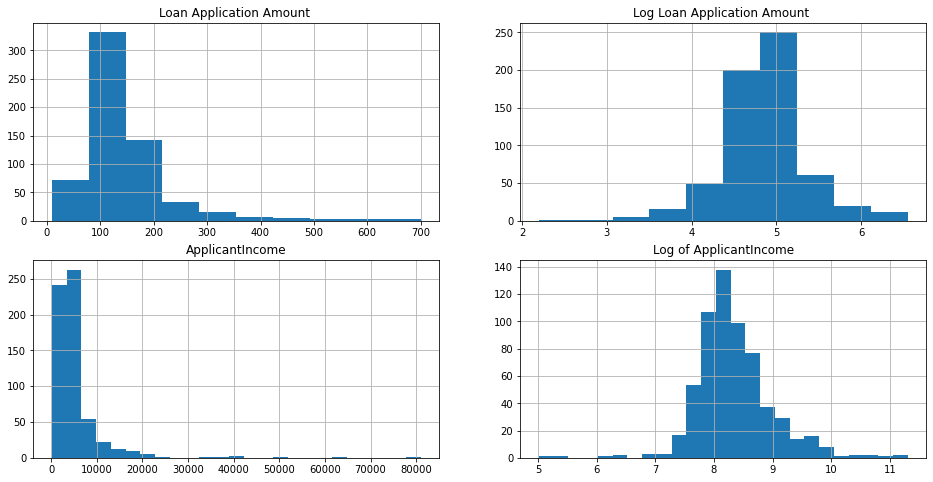

In [16]:
plt.figure(figsize=(16,8))

plt.subplot(2, 2, 1)
data['LoanAmount'].hist(bins=10)
plt.title("Loan Application Amount ")

plt.subplot(2, 2, 2)
data['LoanAmount_log'].hist(bins=10)
plt.title("Log Loan Application Amount ")

plt.subplot(2, 2, 3)
data['ApplicantIncome'].hist(bins=25)
plt.title("ApplicantIncome")

plt.subplot(2, 2, 4)
plt.grid()
data['ApplicantIncome_log'].hist(bins=25)
plt.title("Log of ApplicantIncome")

plt.show()

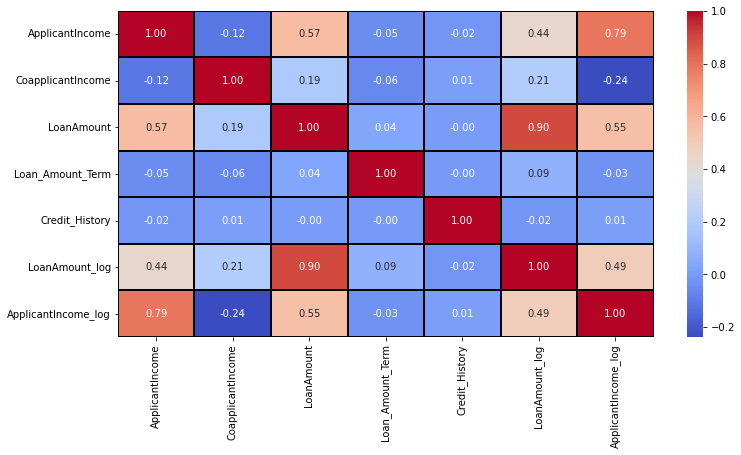

In [17]:
plt.figure(figsize=(12,6))
sns.heatmap(data.corr(),cmap='coolwarm',annot=True,fmt='.2f',linewidths=.1,linecolor='Black')
plt.show()

In [18]:
data.shape

(614, 15)

In [19]:
X = data.drop(['Loan_ID','Loan_Status'],axis=1)
Y = data['Loan_Status']

In [20]:
X['Gender'].value_counts()

Male      502
Female    112
Name: Gender, dtype: int64

In [21]:
X['Married'].value_counts()

Yes    401
No     213
Name: Married, dtype: int64

In [22]:
X['Dependents'].value_counts()

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [23]:
X['Education'].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [24]:
X['Self_Employed'].value_counts()

No     532
Yes     82
Name: Self_Employed, dtype: int64

In [25]:
Y.value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

# Data Encoding

In [26]:
X.Gender = X.Gender.replace({"Male": 1, "Female" : 0})
X.Married = X.Married.replace({"Yes": 1, "No" : 0})
X.Education= X.Education.replace({"Graduate": 1, "Not Graduate" : 0})
X.Self_Employed = X.Self_Employed.replace({"Yes": 1, "No" : 0})
X.Dependents = X.Dependents.replace({"0": 3, "1" :2,"2":1,"3+":0})
X.Property_Area = X.Property_Area.replace({"Rural": 0, "Semiurban" :1,"Urban":2})
Y = Y.replace({"Y": 1, "N" :0})

In [27]:
X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount_log,ApplicantIncome_log
0,1,0,3,1,0,5849,0.0,128.0,360.0,1.0,2,4.852030,8.674026
1,1,1,2,1,0,4583,1508.0,128.0,360.0,1.0,0,4.852030,8.430109
2,1,1,3,1,1,3000,0.0,66.0,360.0,1.0,2,4.189655,8.006368
3,1,1,3,0,0,2583,2358.0,120.0,360.0,1.0,2,4.787492,7.856707
4,1,0,3,1,0,6000,0.0,141.0,360.0,1.0,2,4.948760,8.699515


# Data Balancing

In [28]:
undersample = RandomUnderSampler(sampling_strategy='majority')
X_under, Y_under = undersample.fit_resample(X,Y)

In [29]:
print(X_under.shape,Y_under.shape)

(384, 13) (384,)


# Train & Test Split

In [30]:
X_train,X_test,y_train,y_test=train_test_split(X_under,Y_under,test_size=0.2)

In [31]:
print(X.shape,X_train.shape,X_test.shape)

(614, 13) (307, 13) (77, 13)


In [32]:
# Feature transformation

In [33]:
sc = MinMaxScaler()
X_train = pd.DataFrame(sc.fit_transform(X_train))
X_test =  pd.DataFrame(sc.fit_transform(X_test))

# Training Model

In [34]:
KNN = KNeighborsClassifier(n_neighbors=5)
KNN.fit(X_train,y_train)
print("KNN model score: ",KNN.score(X_test,y_test))

LR = LogisticRegression()
LR.fit(X_train,y_train)
print("Logistic model score: ",LR.score(X_test,y_test))

DC = DecisionTreeClassifier()
DC.fit(X_train,y_train)
print("DecisionTree model score: ",DC.score(X_test,y_test))

RF = RandomForestClassifier(n_estimators=20)
RF.fit(X_train,y_train)
print("RandomForest model score: ",RF.score(X_test,y_test))

SVM = SVC(kernel='sigmoid')
SVM.fit(X_train,y_train)
print("SVM model score: ",SVM.score(X_test,y_test))

NB = GaussianNB()
NB.fit(X_train,y_train)
print("Naive Bayes model score: ",NB.score(X_test,y_test))


KNN model score:  0.5974025974025974
Logistic model score:  0.7272727272727273
DecisionTree model score:  0.6493506493506493
RandomForest model score:  0.6493506493506493
SVM model score:  0.4675324675324675
Naive Bayes model score:  0.7142857142857143
